In [473]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import plotly as py
from plotly.offline import init_notebook_mode,iplot
init_notebook_mode(connected=True)
plt.style.use('ggplot')
from matplotlib import style
%matplotlib inline

In [474]:
df = pd.read_csv('//home/students/aljamo01/CompleteDataset.csv')
df.columns

/usr/local/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning:

Columns (23,35) have mixed types. Specify dtype option on import or set low_memory=False.



Index(['Unnamed: 0', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall',
       'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Acceleration', 'Aggression', 'Agility', 'Balance', 'Ball control',
       'Composure', 'Crossing', 'Curve', 'Dribbling', 'Finishing',
       'Free kick accuracy', 'GK diving', 'GK handling', 'GK kicking',
       'GK positioning', 'GK reflexes', 'Heading accuracy', 'Interceptions',
       'Jumping', 'Long passing', 'Long shots', 'Marking', 'Penalties',
       'Positioning', 'Reactions', 'Short passing', 'Shot power',
       'Sliding tackle', 'Sprint speed', 'Stamina', 'Standing tackle',
       'Strength', 'Vision', 'Volleys', 'CAM', 'CB', 'CDM', 'CF', 'CM', 'ID',
       'LAM', 'LB', 'LCB', 'LCM', 'LDM', 'LF', 'LM', 'LS', 'LW', 'LWB',
       'Preferred Positions', 'RAM', 'RB', 'RCB', 'RCM', 'RDM', 'RF', 'RM',
       'RS', 'RW', 'RWB', 'ST'],
      dtype='object')

In [475]:
df = df[['Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club', 'Value','Wage', 'Preferred Positions']]
df.head(10)


,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Positions
0,Cristiano Ronaldo,32,Portugal,94,94,Real Madrid CF,€95.5M,€565K,ST LW
1,L. Messi,30,Argentina,93,93,FC Barcelona,€105M,€565K,RW
2,Neymar,25,Brazil,92,94,Paris Saint-Germain,€123M,€280K,LW
3,L. Suárez,30,Uruguay,92,92,FC Barcelona,€97M,€510K,ST
4,M. Neuer,31,Germany,92,92,FC Bayern Munich,€61M,€230K,GK
5,R. Lewandowski,28,Poland,91,91,FC Bayern Munich,€92M,€355K,ST
6,De Gea,26,Spain,90,92,Manchester United,€64.5M,€215K,GK
7,E. Hazard,26,Belgium,90,91,Chelsea,€90.5M,€295K,LW
8,T. Kroos,27,Germany,90,90,Real Madrid CF,€79M,€340K,CDM CM
9,G. Higuaín,29,Argentina,90,90,Juventus,€77M,€275K,ST


# Cleaning The data

In [476]:
#Cleaning the data:
def DataCleaning1(value):
    if value[-1] == 'M':
        return float(value[1:-1])
    elif value[-1] == 'K':
        return float(value[1:-1])/1000
    else:
        return float(value[1:])
def DataCleaning2(wage):
    if wage[-1] == 'M':
        return float(wage[1:-1])*1000
    elif wage[-1] == 'K':
        return float(wage[1:-1])
    else:
        return float(wage[1:])
#adding the columns    
df['Remaining Potential'] = df['Potential'] - df['Overall']
df['Preferred Position'] = df['Preferred Positions'].str.split().str[0]
df['Value(M)'] = df['Value'].apply(lambda x: DataCleaning1(x))
df['Wage(k)']= df['Wage'].apply(lambda x: DataCleaning2(x))
del df['Value']
del df['Wage']
df.head(10)

,Name,Age,Nationality,Overall,Potential,Club,Preferred Positions,Remaining Potential,Preferred Position,Value(M),Wage(k)
0,Cristiano Ronaldo,32,Portugal,94,94,Real Madrid CF,ST LW,0,ST,95.5,565.0
1,L. Messi,30,Argentina,93,93,FC Barcelona,RW,0,RW,105.0,565.0
2,Neymar,25,Brazil,92,94,Paris Saint-Germain,LW,2,LW,123.0,280.0
3,L. Suárez,30,Uruguay,92,92,FC Barcelona,ST,0,ST,97.0,510.0
4,M. Neuer,31,Germany,92,92,FC Bayern Munich,GK,0,GK,61.0,230.0
5,R. Lewandowski,28,Poland,91,91,FC Bayern Munich,ST,0,ST,92.0,355.0
6,De Gea,26,Spain,90,92,Manchester United,GK,2,GK,64.5,215.0
7,E. Hazard,26,Belgium,90,91,Chelsea,LW,1,LW,90.5,295.0
8,T. Kroos,27,Germany,90,90,Real Madrid CF,CDM CM,0,CDM,79.0,340.0
9,G. Higuaín,29,Argentina,90,90,Juventus,ST,0,ST,77.0,275.0


# A Look at the Data Varialbles

In [477]:
df.describe()

,Age,Overall,Potential,Remaining Potential,Value(M),Wage(k)
count,17981.000000,17981.000000,17981.000000,17981.000000,17981.00000,17981.000000
mean,25.144541,66.247984,71.190813,4.942829,2.38539,11.546966
std,4.614272,6.987965,6.102199,5.270594,5.35397,23.080000
min,16.000000,46.000000,46.000000,0.000000,0.00000,0.000000
25%,21.000000,62.000000,67.000000,0.000000,0.30000,2.000000
50%,25.000000,66.000000,71.000000,3.000000,0.67500,4.000000
75%,28.000000,71.000000,75.000000,8.000000,2.10000,12.000000
max,47.000000,94.000000,94.000000,26.000000,123.00000,565.000000


In [478]:
df_sort = df.copy()
columns = ['Potential', 'Preferred Positions']
df_sort.drop(columns, inplace=True, axis=1)
df_sort.head(10)

,Name,Age,Nationality,Overall,Club,Remaining Potential,Preferred Position,Value(M),Wage(k)
0,Cristiano Ronaldo,32,Portugal,94,Real Madrid CF,0,ST,95.5,565.0
1,L. Messi,30,Argentina,93,FC Barcelona,0,RW,105.0,565.0
2,Neymar,25,Brazil,92,Paris Saint-Germain,2,LW,123.0,280.0
3,L. Suárez,30,Uruguay,92,FC Barcelona,0,ST,97.0,510.0
4,M. Neuer,31,Germany,92,FC Bayern Munich,0,GK,61.0,230.0
5,R. Lewandowski,28,Poland,91,FC Bayern Munich,0,ST,92.0,355.0
6,De Gea,26,Spain,90,Manchester United,2,GK,64.5,215.0
7,E. Hazard,26,Belgium,90,Chelsea,1,LW,90.5,295.0
8,T. Kroos,27,Germany,90,Real Madrid CF,0,CDM,79.0,340.0
9,G. Higuaín,29,Argentina,90,Juventus,0,ST,77.0,275.0


In [479]:

df_sort.sort_values(["Value(M)"],ascending = False).head(10)

,Name,Age,Nationality,Overall,Club,Remaining Potential,Preferred Position,Value(M),Wage(k)
2,Neymar,25,Brazil,92,Paris Saint-Germain,2,LW,123.0,280.0
1,L. Messi,30,Argentina,93,FC Barcelona,0,RW,105.0,565.0
3,L. Suárez,30,Uruguay,92,FC Barcelona,0,ST,97.0,510.0
0,Cristiano Ronaldo,32,Portugal,94,Real Madrid CF,0,ST,95.5,565.0
5,R. Lewandowski,28,Poland,91,FC Bayern Munich,0,ST,92.0,355.0
7,E. Hazard,26,Belgium,90,Chelsea,1,LW,90.5,295.0
11,K. De Bruyne,26,Belgium,89,Manchester City,3,RM,83.0,285.0
8,T. Kroos,27,Germany,90,Real Madrid CF,0,CDM,79.0,340.0
19,P. Dybala,23,Argentina,88,Juventus,5,ST,79.0,215.0
9,G. Higuaín,29,Argentina,90,Juventus,0,ST,77.0,275.0


In [480]:
df_sort.sort_values(["Wage(k)"], ascending=False).head(10)

,Name,Age,Nationality,Overall,Club,Remaining Potential,Preferred Position,Value(M),Wage(k)
0,Cristiano Ronaldo,32,Portugal,94,Real Madrid CF,0,ST,95.5,565.0
1,L. Messi,30,Argentina,93,FC Barcelona,0,RW,105.0,565.0
3,L. Suárez,30,Uruguay,92,FC Barcelona,0,ST,97.0,510.0
15,G. Bale,27,Wales,89,Real Madrid CF,0,RW,69.5,370.0
5,R. Lewandowski,28,Poland,91,FC Bayern Munich,0,ST,92.0,355.0
14,L. Modrić,31,Croatia,89,Real Madrid CF,0,CDM,57.0,340.0
8,T. Kroos,27,Germany,90,Real Madrid CF,0,CDM,79.0,340.0
16,S. Agüero,29,Argentina,89,Manchester City,0,ST,66.5,325.0
10,Sergio Ramos,31,Spain,90,Real Madrid CF,0,CB,52.0,310.0
7,E. Hazard,26,Belgium,90,Chelsea,1,LW,90.5,295.0


In [481]:
df_sort.sort_values(["Remaining Potential"], ascending=False).head(10)

,Name,Age,Nationality,Overall,Club,Remaining Potential,Preferred Position,Value(M),Wage(k)
17950,D. Amos,17,England,48,Doncaster Rovers,26,LM,0.060,1.0
17961,J. Latibeaudiere,17,England,47,Manchester City,26,CB,0.060,5.0
17123,C. Gregory,17,England,54,Shrewsbury,26,GK,0.120,1.0
11397,A. Gomes,16,England,64,Manchester United,26,CM,0.975,9.0
17849,S. Sessegnon,17,England,50,Fulham,25,CB,0.060,2.0
17515,M. Cooper,17,England,52,Plymouth Argyle,25,GK,0.090,1.0
17326,V. Demaku,17,Austria,53,FK Austria Wien,24,CDM,0.130,2.0
17025,L. Pintor,16,France,54,Stade Brestois 29,24,ST,0.150,1.0
17402,E. Simonsen,17,Denmark,53,Lyngby BK,24,CAM,0.130,1.0
16374,L. Plogmann,17,Germany,57,Werder Bremen II,24,GK,0.190,1.0


# The Best Squad? Best Bench?

In [497]:
#finding the hieghst overall for each of the 11 positions
def best_squad(p):
    df1 = df.copy()
    mylist = []
    for item in p:
        mylist.append([item,df1.loc[[df1[df1['Preferred Position'] == item]['Overall'].idxmax()]]['Name'].to_string(index = False), df1[df1['Preferred Position'] == item]['Overall'].max()])
        df1.drop(df1[df1['Preferred Position'] == item]['Overall'].idxmax(), inplace = True)
    return pd.DataFrame(np.array(mylist).reshape(11,3), columns = ['Position', 'Player', 'Overall']).to_string(index = False)

def get_best_bench(p):
    df2 = df.copy().drop([0,1,2,4,8,10,17,39,33,54,98]) #exclude the starter squad
    mylist = []
    for i in p:
        mylist.append([i, df2.loc[[df2[df2['Preferred Position'] == i]['Overall'].idxmax()]]['Name'].to_string(index = False), df2[df2['Preferred Position'] == i]['Overall'].max()])
        df2.drop(df2[df2['Preferred Position'] == i]['Overall'].idxmax(), inplace = True)
    return pd.DataFrame(np.array(mylist).reshape(7,3), columns = ['Position', 'Player', 'Overall']).to_string(index = False)


starter_squad = ['GK', 'LB', 'CB', 'CB', 'RB','CDM', 'CM', 'CAM', 'LW', 'ST', 'RW']
bench = ['GK', 'LB', 'CB', 'CDM','CM','LW', 'ST' ]
print("Starters")
print('Formation: 4-3-3')
print (best_squad(starter_squad))
print("Bench- 7 Players")
print (get_best_bench(bench))

Starters
Formation: 4-3-3
Position             Player Overall
     GK           M. Neuer      92
     LB            Marcelo      87
     CB       Sergio Ramos      90
     CB       G. Chiellini      89
     RB           Carvajal      84
    CDM           T. Kroos      90
     CM           N. Kanté      87
    CAM           Coutinho      86
     LW             Neymar      92
     ST  Cristiano Ronaldo      94
     RW           L. Messi      93
Bench- 7 Players
Position      Player Overall
     GK      De Gea      90
     LB  Jordi Alba      85
     CB  L. Bonucci      88
    CDM   L. Modrić      89
     CM    A. Vidal      87
     LW   E. Hazard      90
     ST   L. Suárez      92


In [483]:
#Find the id of each player in the squad
df[df['Name'].str.contains("Carvajal")]

,Name,Age,Nationality,Overall,Potential,Club,Preferred Positions,Remaining Potential,Preferred Position,Value(M),Wage(k)
98,Carvajal,25,Spain,84,87,Real Madrid CF,RB,3,RB,32.00,195.0
12772,D. Carvajal,28,Costa Rica,63,63,Albacete Balompié,GK,0,GK,0.26,2.0


# What is the age that has the most overall? 

In [484]:
analysis = df[['Club','Nationality','Age','Overall', 'Preferred Position']]
analysis.head()

,Club,Nationality,Age,Overall,Preferred Position
0,Real Madrid CF,Portugal,32,94,ST
1,FC Barcelona,Argentina,30,93,RW
2,Paris Saint-Germain,Brazil,25,92,LW
3,FC Barcelona,Uruguay,30,92,ST
4,FC Bayern Munich,Germany,31,92,GK


In [485]:
PP_group=analysis.groupby(['Age','Preferred Position']).sum()
PP_group.head()

Overall
Age Preferred Position         
16  CAM                      61
    CB                       58
    CM                      228
    GK                       57
    LB                       65

In [486]:
PP_group.unstack()

Overall                                                    \
Preferred Position     CAM       CB     CDM      CF       CM      GK      LB   
Age                                                                            
16                    61.0     58.0     NaN     NaN    228.0    57.0    65.0   
17                  1482.0   1803.0   465.0    63.0   2032.0  2130.0   689.0   
18                  2840.0   4695.0  2091.0   372.0   5460.0  4174.0  2594.0   
19                  5293.0   8123.0  3600.0   495.0   9599.0  6197.0  4662.0   
20                  5745.0   9832.0  5098.0   716.0   9290.0  7047.0  5492.0   
21                  4938.0  10420.0  6303.0   443.0  10685.0  8929.0  5587.0   
22                  6612.0  11370.0  7504.0   918.0   9648.0  7559.0  5650.0   
23                  5558.0  13580.0  7054.0   676.0   9788.0  8824.0  7044.0   
24                  5138.0  13369.0  7319.0  1224.0   8729.0  8571.0  5334.0   
25                  7165.0  15240.0  8108.0  2082.0  11203.0  8095.0  7166.0   
26                  4721.0  11863.0  6796.0  1249.0   7807.0  8496.0  6324.0   
27                  5001.0  11706.0  6999.0   555.0   7797.0  7328.0  6669.0   
28                  3656.0  12418.0  5909.0  1081.0   8038.0  7734.0  5954.0   
29                  4784.0  12047.0  6424.0  1437.0   7547.0  7986.0  6961.0   
30                  3054.0  10137.0  4848.0   418.0   5082.0  6648.0  4280.0   
31                  2164.0   9889.0  3841.0   430.0   4942.0  5804.0  3418.0   
32                  1538.0   7842.0  3375.0   701.0   3185.0  5032.0  2808.0   
33                  3055.0   6647.0  3334.0   508.0   4242.0  6386.0  3244.0   
34                   848.0   3680.0  1832.0   146.0   2178.0  4281.0  1054.0   
35                   411.0   2064.0  1307.0   212.0    749.0  3261.0   745.0   
36                   417.0   1990.0  1173.0    75.0    541.0  2818.0   366.0   
37                   140.0   1019.0   347.0   128.0    497.0  1713.0    68.0   
38                   191.0    336.0    79.0     NaN    479.0   783.0     NaN   
39                    71.0    348.0    55.0     NaN     65.0   760.0    59.0   
40                    72.0     73.0    61.0     NaN     74.0   261.0     NaN   
41                     NaN     67.0     NaN     NaN      NaN   126.0     NaN   
43                     NaN      NaN     NaN     NaN      NaN   110.0     NaN   
44                     NaN      NaN     NaN     NaN      NaN   141.0     NaN   
47                     NaN      NaN     NaN     NaN      NaN    46.0     NaN   

                                                                          \
Preferred Position      LM      LW    LWB      RB      RM      RW    RWB   
Age                                                                        
16                     NaN     NaN    NaN    59.0    54.0     NaN    NaN   
17                   704.0   473.0   51.0   480.0   779.0   698.0    NaN   
18                  2157.0   957.0   56.0  2051.0  2771.0  1083.0  117.0   
19                  4611.0  2291.0  190.0  4463.0  4092.0  1937.0   55.0   
20                  6511.0  2394.0  267.0  4341.0  5660.0  2386.0  543.0   
21                  5986.0  2533.0  431.0  5275.0  6943.0  2953.0  613.0   
22                  7242.0  2524.0  976.0  5852.0  8113.0  2646.0  651.0   
23                  8055.0  2434.0  948.0  5793.0  7582.0  2853.0  480.0   
24                  7782.0  2400.0  817.0  6201.0  6928.0  2838.0  688.0   
25                  9180.0  2678.0  563.0  7564.0  9021.0  2077.0  754.0   
26                  6236.0  2710.0  720.0  4658.0  7326.0  2205.0  447.0   
27                  6594.0  1549.0  560.0  6403.0  5640.0  1187.0  930.0   
28                  4926.0  1366.0  687.0  4722.0  4573.0  1111.0  399.0   
29                  5657.0  1077.0  267.0  5269.0  7232.0  1364.0  625.0   
30                  3979.0  1136.0  619.0  3957.0  3568.0  1166.0  401.0   
31                  2603.0   825.0  204.0  2937.0  3076.0   842.0  475.0   
32            

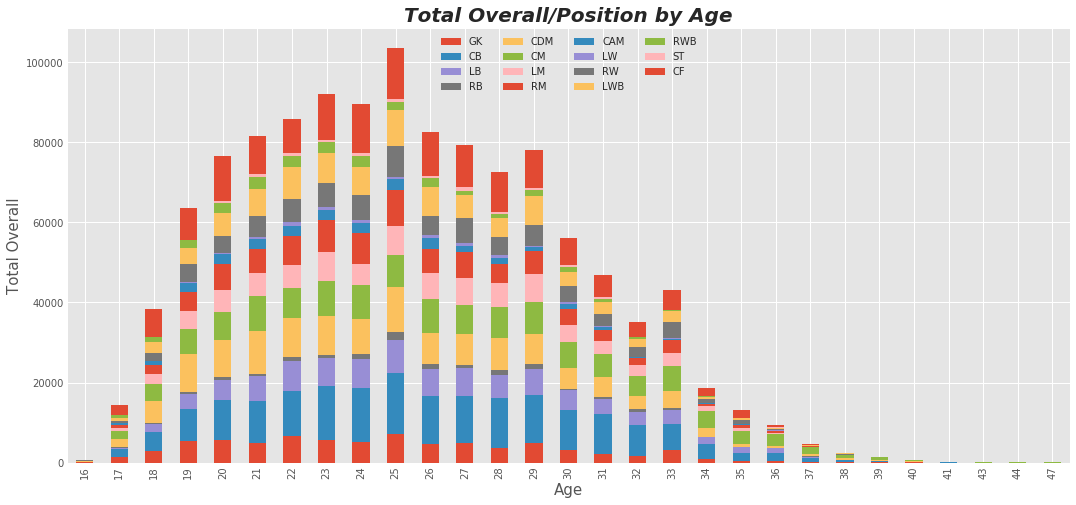

In [487]:
my_plot = nationality_group.unstack().plot(kind='bar',stacked=True,figsize=(16, 8))
my_plot.set_title("Total Overall/Position by Age",fontsize=20, fontweight='bold',fontstyle='italic')
my_plot.set_xlabel("Age",fontsize=15)
my_plot.set_ylabel("Total Overall",fontsize=15)
my_plot.legend(["GK","CB","LB","RB","CDM","CM","LM","RM","CAM","LW","RW","LWB","RWB","ST","CF"], loc=9,ncol=4)


# Relationships Graph

Text(0.5,3.4,'Relationships')

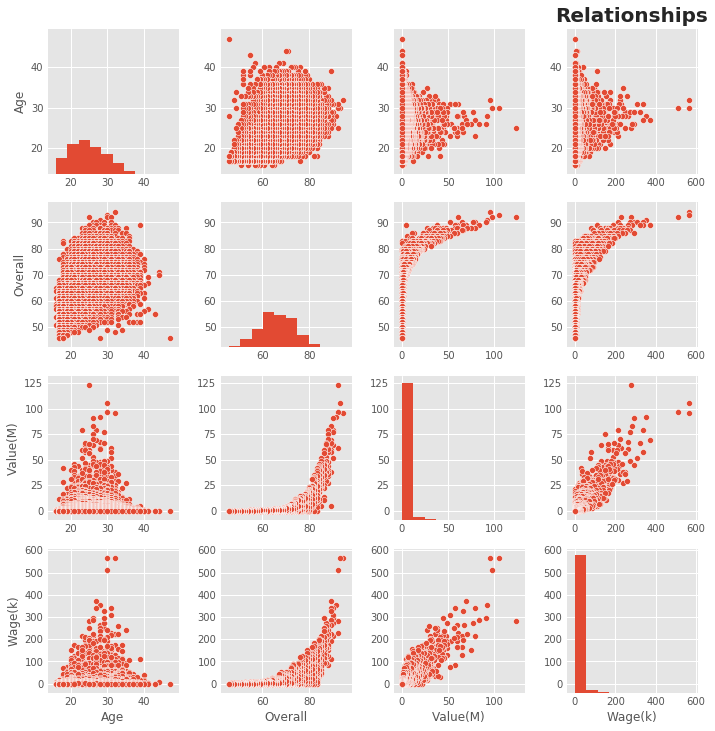

In [488]:
df_g= df[[ 'Age', 'Overall','Value(M)','Wage(k)']]
g = sns.pairplot(df_g)
plt.title('Relationships', fontsize=20, fontweight='bold',y=3.4)

# Age, Overall, and Preffered Position Count Analysis

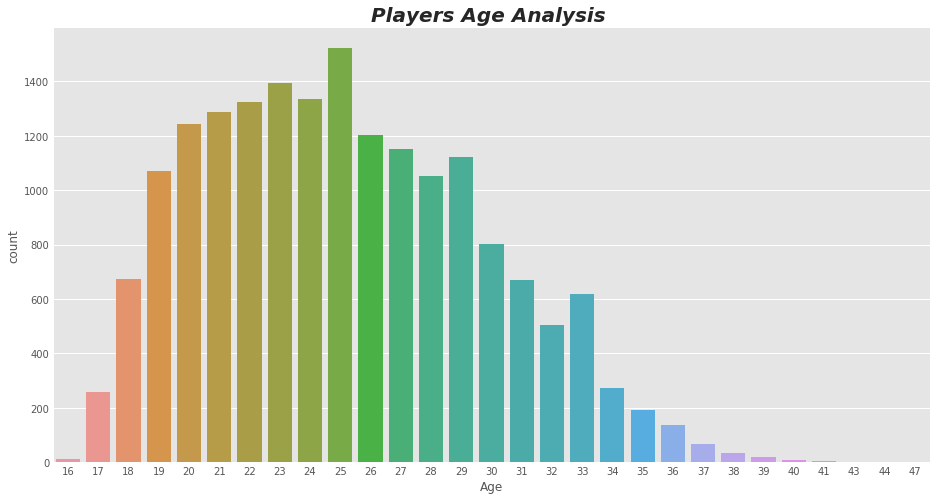

In [489]:
plt.figure(figsize=(14,8))
plt.title('Players Age Analysis ', fontsize=20, fontweight='bold',fontstyle='italic')
sns.countplot(x="Age", data=df);
plt.show()

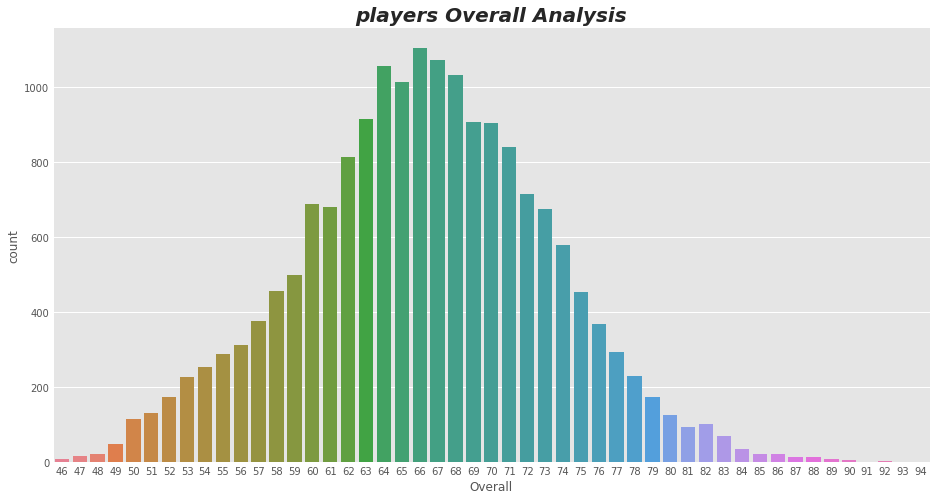

In [490]:
plt.figure(figsize=(14,8))
plt.title('players Overall Analysis',fontsize=20,fontweight='bold',fontstyle='italic')
sns.countplot(x="Overall", data=df, palette=("husl"));
plt.show()

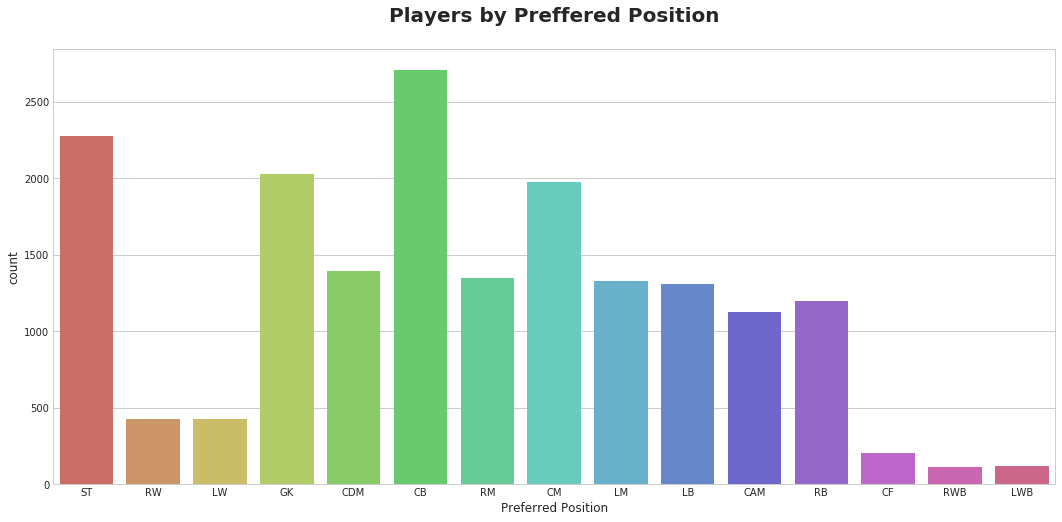

In [491]:
plt.figure(figsize=(16,8))
sns.set_style("whitegrid")
plt.title('Players by Preffered Position', fontsize=20, fontweight='bold', y=1.05)
sns.countplot(x="Preferred Position", data=df, palette="hls");
plt.show()

# The remaining potential by age and positions

Text(40,22,'-Attack')

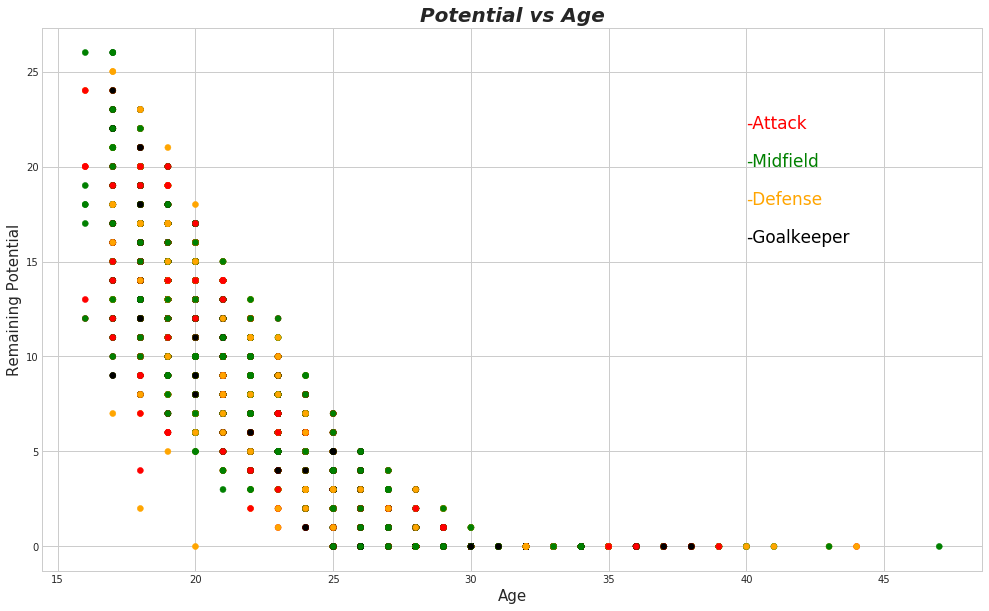

In [492]:
x = df['Age']
y = df['Remaining Potential']

def plot_chart(X,Y,c):
    plt.figure(figsize = (15,10))
    plt.scatter(X, Y, color=c)
    plt.title('Potential vs Age',fontsize=20, fontweight='bold',fontstyle='italic')
    plt.xlabel('Age',fontsize=15)
    plt.ylabel('Remaining Potential',fontsize=15)

positions_color = {'ST': 'red', 'CF': 'red',  'RW': 'red','LW': 'red',
                   'CM': 'green','CAM': 'green', 'CDM': 'green','RM': 'green','LM': 'green',
                   'CB': 'orange',  'RB': 'orange', 'LB': 'orange','LWB': 'orange', 'RWB': 'orange',
                   'GK': 'black'}

c = df_2['Preferred Position'].map(positions_color)
plot_chart(x,y , c)
plt.text(40, 16, '-Goalkeeper',color = 'black',fontsize=17)
plt.text(40, 18, '-Defense',color = 'orange',fontsize=17 )
plt.text(40, 20, '-Midfield',color = 'green',fontsize=17)
plt.text(40, 22, '-Attack',color = 'red',fontsize=17 )


# Overall and Player Value in million

Text(0.1,1.05,'Players Value in millions Vs Overall Analysis')

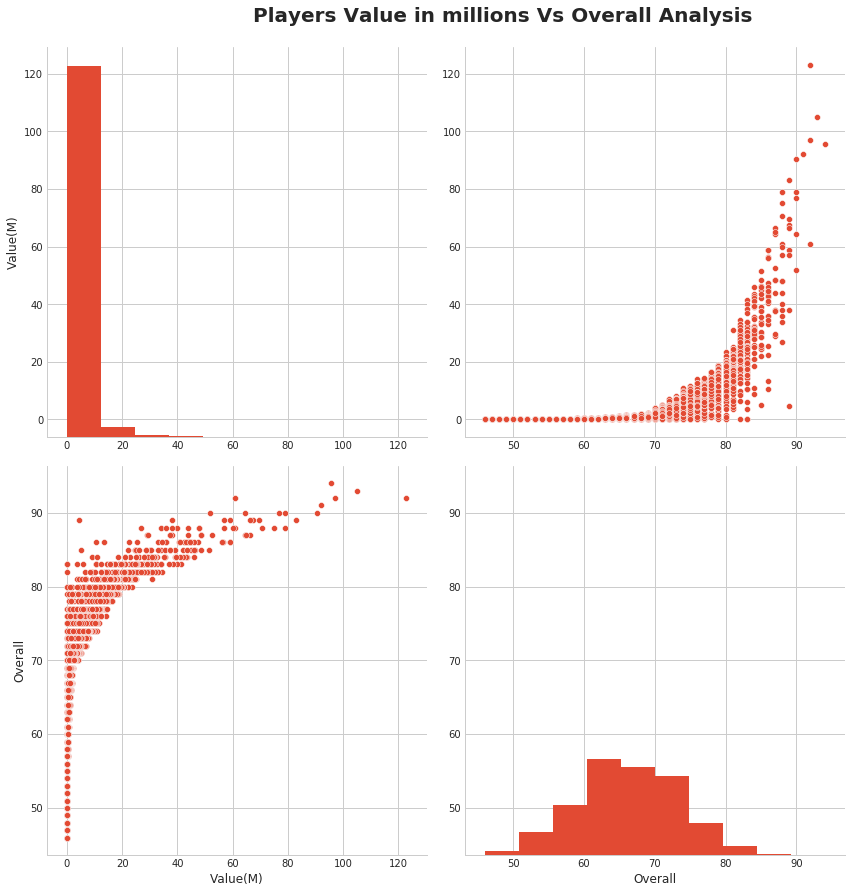

In [493]:
sns.pairplot(df, vars=[ "Value(M)","Overall"], size=6)
plt.title('Players Value in millions Vs Overall Analysis', fontsize=20, fontweight='bold',y=1.05,x=0.1)

# Overall and Potential

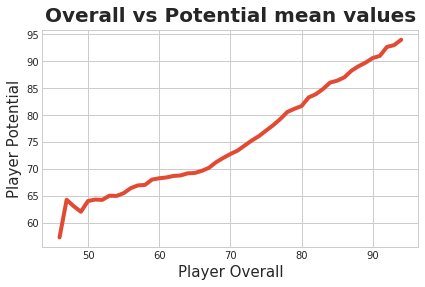

In [494]:
overall = df.sort_values("Overall")['Overall'].unique()
potential = df.groupby("Overall")["Potential"].mean().values
plt.title('Overall vs Potential mean values', fontsize=20, fontweight='bold', y=1.01)
plt.xlabel('Player Overall', fontsize=15)
plt.ylabel('Player Potential', fontsize=15)
sns.set_style("whitegrid")
plt.plot(overall, potential)
plt.show()

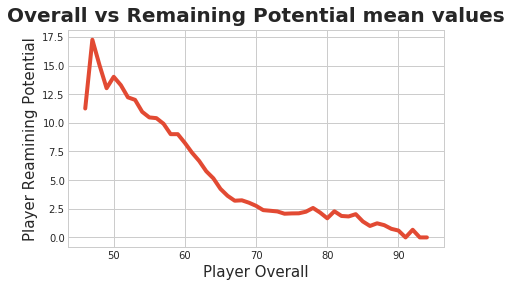

In [495]:
overall = df.sort_values("Overall")['Overall'].unique()
potential = df.groupby("Overall")["Remaining Potential"].mean().values
plt.title('Overall vs Remaining Potential mean values', fontsize=20, fontweight='bold', y=1.01)
plt.xlabel('Player Overall', fontsize=15)
plt.ylabel('Player Reamining Potential', fontsize=15)
sns.set_style("whitegrid")
plt.plot(overall, potential)
plt.show()


# What countries have the most number of players?

In [496]:
df_nat= df.copy()
nation = df_nat.groupby("Nationality").size().reset_index(name="Count")
data = [ dict(
        type = 'choropleth',
        locations = nation["Nationality"],
        locationmode = 'country names',
        z = nation["Count"],
        text = nation["Nationality"],
        autocolorscale = True,
        reversescale = False,
     )]

layout = dict(
    title = ' Player Distribtuion by Nation',
    geo = dict(
        showframe = False,
        showcoastlines = False,
        projection = dict(
            type = 'Mercator'
        )
    )
)

fig = dict( data=data, layout=layout)
url = py.offline.iplot(fig)